In [1]:
# Browse around hdf5 files of mounted disk
import h5py
import glob
import pandas as pd
import matplotlib.pyplot as plt
ecg_files = glob.glob('/mnt/disks/ecg-rest-31k/2019-06-10/*.hd5')

Normal sinus rhythm
median_I 600
median_II 600
median_III 600
median_V1 600
median_V2 600
median_V3 600
median_V4 600
median_V5 600
median_V6 600
median_aVF 600
median_aVL 600
median_aVR 600
strip_I 5000
strip_II 5000
strip_III 5000
strip_V1 5000
strip_V2 5000
strip_V3 5000
strip_V4 5000
strip_V5 5000
strip_V6 5000
strip_aVF 5000
strip_aVL 5000
strip_aVR 5000


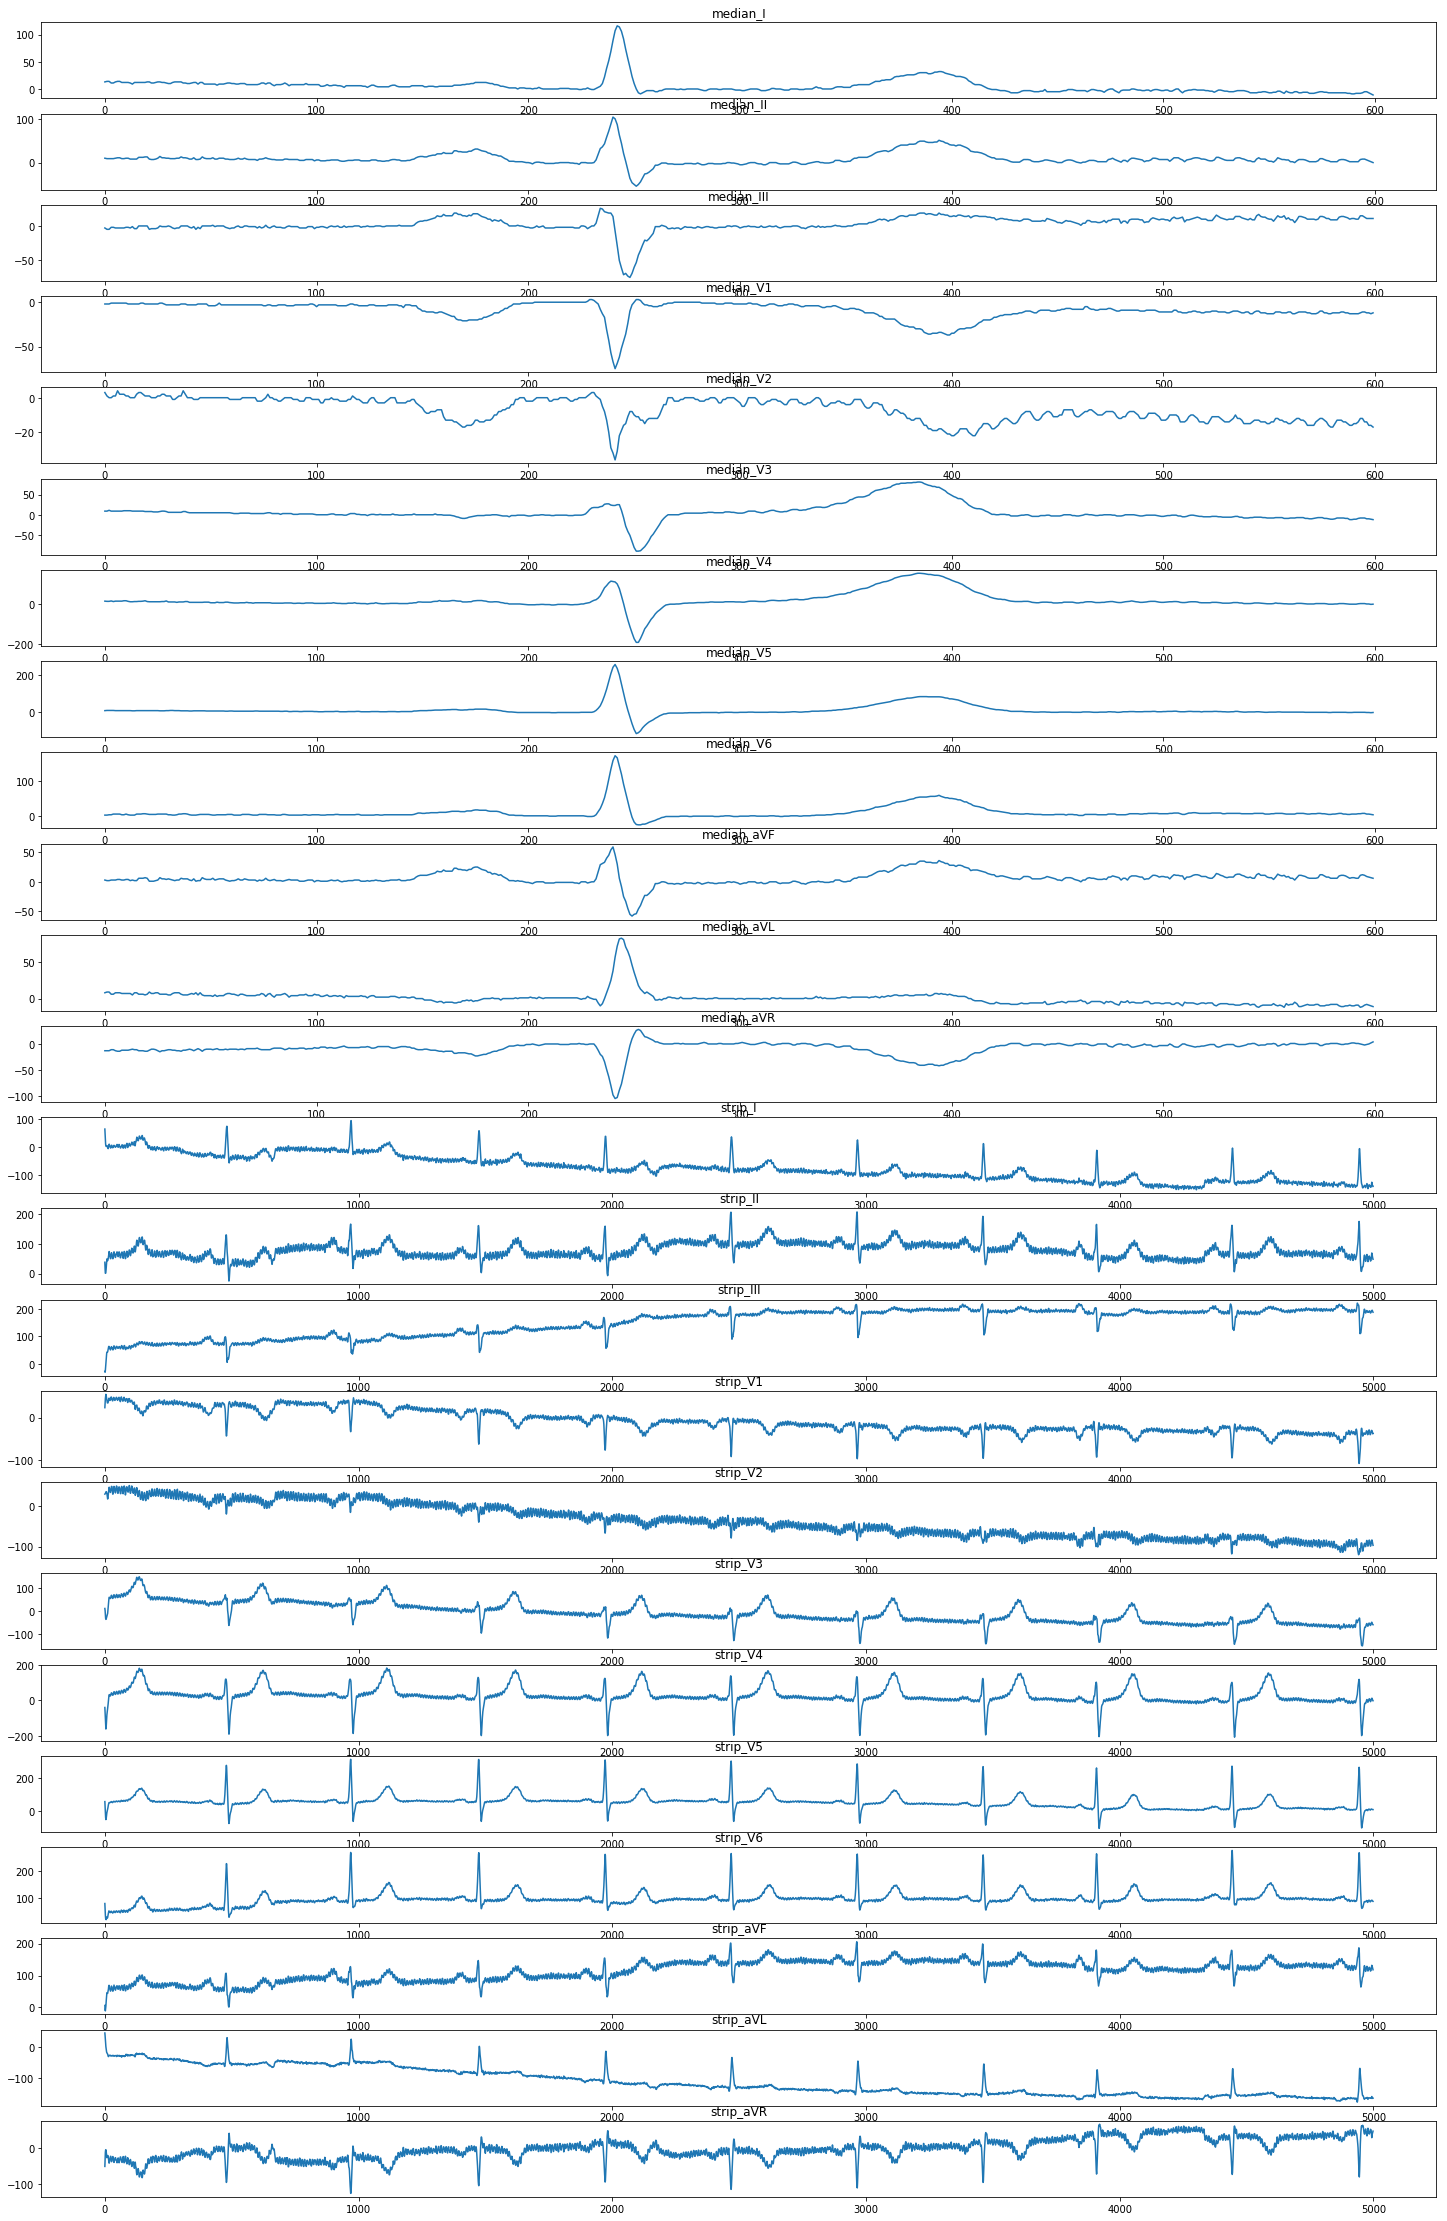

In [2]:
# Plot contents of a typical datafile
ff = h5py.File(ecg_files[0], 'r')
f, ax = plt.subplots(len(ff['/ecg_rest'].keys()), 1)
f.set_size_inches(25, 40)
print(ff['/ecg_rest_text'][0])
for i, ff_k in enumerate(ff['/ecg_rest'].keys()):    
    ax[i].plot(list(ff['/ecg_rest/' + ff_k]))
    ax[i].set_title(ff_k)
    print(ff_k, len(list(ff['/ecg_rest/' + ff_k])))
ff.close()

In [3]:
# Try out TensorMaps generation (by hand) as well as generator for train, test and valid
from ml4cvd.tensor_generators import TensorGenerator, test_train_valid_tensor_generators, get_test_train_valid_paths
from ml4cvd.tensor_generators import big_batch_from_minibatch_generator, multimodal_multitask_generator
from ml4cvd.arguments import _get_tmap

tensor_maps_in = _get_tmap('ecg_rest')
tensor_maps_out = _get_tmap('ecg_semi_coarse')
train_paths, valid_paths, test_paths = get_test_train_valid_paths('/mnt/disks/ecg-rest-31k/2019-06-10/', 
                                                                  0.2, 0.1, 10)

generate_train = multimodal_multitask_generator(32, [tensor_maps_in], [tensor_maps_out], 
                                                train_paths, False, -1.0)

/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '
Using TensorFlow backend.


In [4]:
# Try out model generation
from ml4cvd.models import make_multimodal_to_multilabel_model
model = make_multimodal_to_multilabel_model(None, None, None, 
                                            [tensor_maps_in], [tensor_maps_out],
                                            'relu', [16, 64], 0.0, 
                                            False, [32], [],
                                            [], [32, 24, 16], 3, 
                                            False, 3, 3,
                                            2, 0.0, 71, False,
                                            2, 2,
                                            1, 'same', 0.0002)

ImportError: cannot import name 'make_multimodal_to_multilabel_model'

In [ ]:
from ml4cvd.TensorMap import TensorMap
from ml4cvd.metrics import weighted_crossentropy
tmap_out = TensorMap('ecg_semi_coarse', group='categorical', 
                     loss=weighted_crossentropy([1.0, 1.0, 2.0, 4.0, 16.0, 20.0], 'ecg_semi_coarse'),
                     channel_map={'Normal_sinus_rhythm': 0, 'Sinus_bradycardia': 1, 
                                  'Marked_sinus_bradycardia': 2, 'Other_sinus_rhythm': 3, 
                                  'Atrial_fibrillation': 4, 'Other_rhythm': 5})

In [ ]:
list(ff['categorical'].keys())

In [ ]:
# Load model hdf5 and see what's in it
ff = h5py.File('/mnt/ml4cvd/projects/jamesp/data/models/ecg_rest_semi_coarse_only.hd5')

In [ ]:
ff['model_weights'].keys()